In [15]:
print ("hello world")

hello world


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
dataset = pd.read_csv("/Users/darrenso/Downloads/home-data-for-ml-course/train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
features = []
nullValues = []
for i in dataset:
    if (dataset.isna().sum()[i] > 1000 ) and i != 'SalePrice':
        features.append(i)
        nullValues.append(dataset.isna().sum()[i])

features
print(type(nullValues[0]))
nullValues
#y_pos = np.arange(len[features])
#y_pos


    

<class 'numpy.int64'>


[np.int64(1369), np.int64(1453), np.int64(1179), np.int64(1406)]

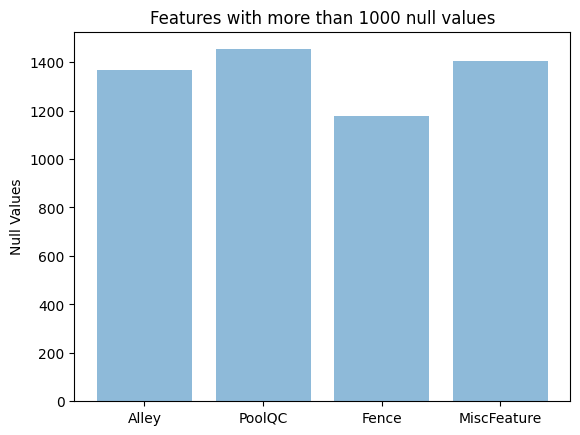

In [20]:
y_pos = np.arange(len(features))
plt.bar(y_pos,nullValues,align='center',alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Null Values')
plt.title('Features with more than 1000 null values')
plt.show()

In [21]:
dataset = dataset.dropna(axis = 1,thresh=1000)

numerical_features = dataset.select_dtypes(include=['int64','float64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

dataset[numerical_features] = dataset[numerical_features].fillna(dataset[numerical_features].mean())
dataset[categorical_features] = dataset[categorical_features].fillna(dataset[categorical_features].mode().iloc(0))

#dataset = dataset.fillna(dataset.mean())
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
dataset = pd.get_dummies(dataset)
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [13]:
cov_matrix = dataset.cov()
cov_matrix
listOfFeatures = (i for i in cov_matrix)
setOfDropFeatures = set()

for i in range (len(listOfFeatures)):
    for j in range:(i+1,len(listOfFeatures)):
        feature1 = listOfFeatures
        feature2 = listOfFeatures
        if abs(cov_matrix[feature1][feature2]) > 0.8:
        setOfDropFeatures.add[feature1]
        setOfDropFeatures.add[feature2]


SyntaxError: invalid syntax (3127492503.py, line 7)

In [45]:
dataset = dataset.drop(['MSSubClass','LotFrontage','MSZoning','Street','LotShape','LandContour','Utilities','Neighborhood'], axis=1)

In [46]:
dataset

,Id,LotArea,Alley,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,9600,NaN,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,11250,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,9550,NaN,Corner,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14260,NaN,FR2,Gtl,Norm,Norm,1Fam,2Story,8,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,6,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,13175,NaN,Inside,Gtl,Norm,Norm,1Fam,1Story,6,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,9042,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,9717,NaN,Inside,Gtl,Norm,Norm,1Fam,1Story,5,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [47]:
#split into features and labels
x = dataset['YearBuilt']
y = dataset['SalePrice']

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
train_x = x.values.reshape (-1,1)
train_y = y.values.reshape (-1,1)
regressor.fit(train_x,train_y)


LinearRegression()

In [49]:
regressor.predict([[2003]])

array([[224564.81054524]])

In [50]:
regressor.predict([[1958]])

array([[162673.00448808]])

In [51]:
dataset

,Id,LotArea,Alley,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,9600,NaN,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,11250,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,9550,NaN,Corner,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14260,NaN,FR2,Gtl,Norm,Norm,1Fam,2Story,8,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,6,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,13175,NaN,Inside,Gtl,Norm,Norm,1Fam,1Story,6,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,9042,NaN,Inside,Gtl,Norm,Norm,1Fam,2Story,7,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,9717,NaN,Inside,Gtl,Norm,Norm,1Fam,1Story,5,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


KeyboardInterrupt: 

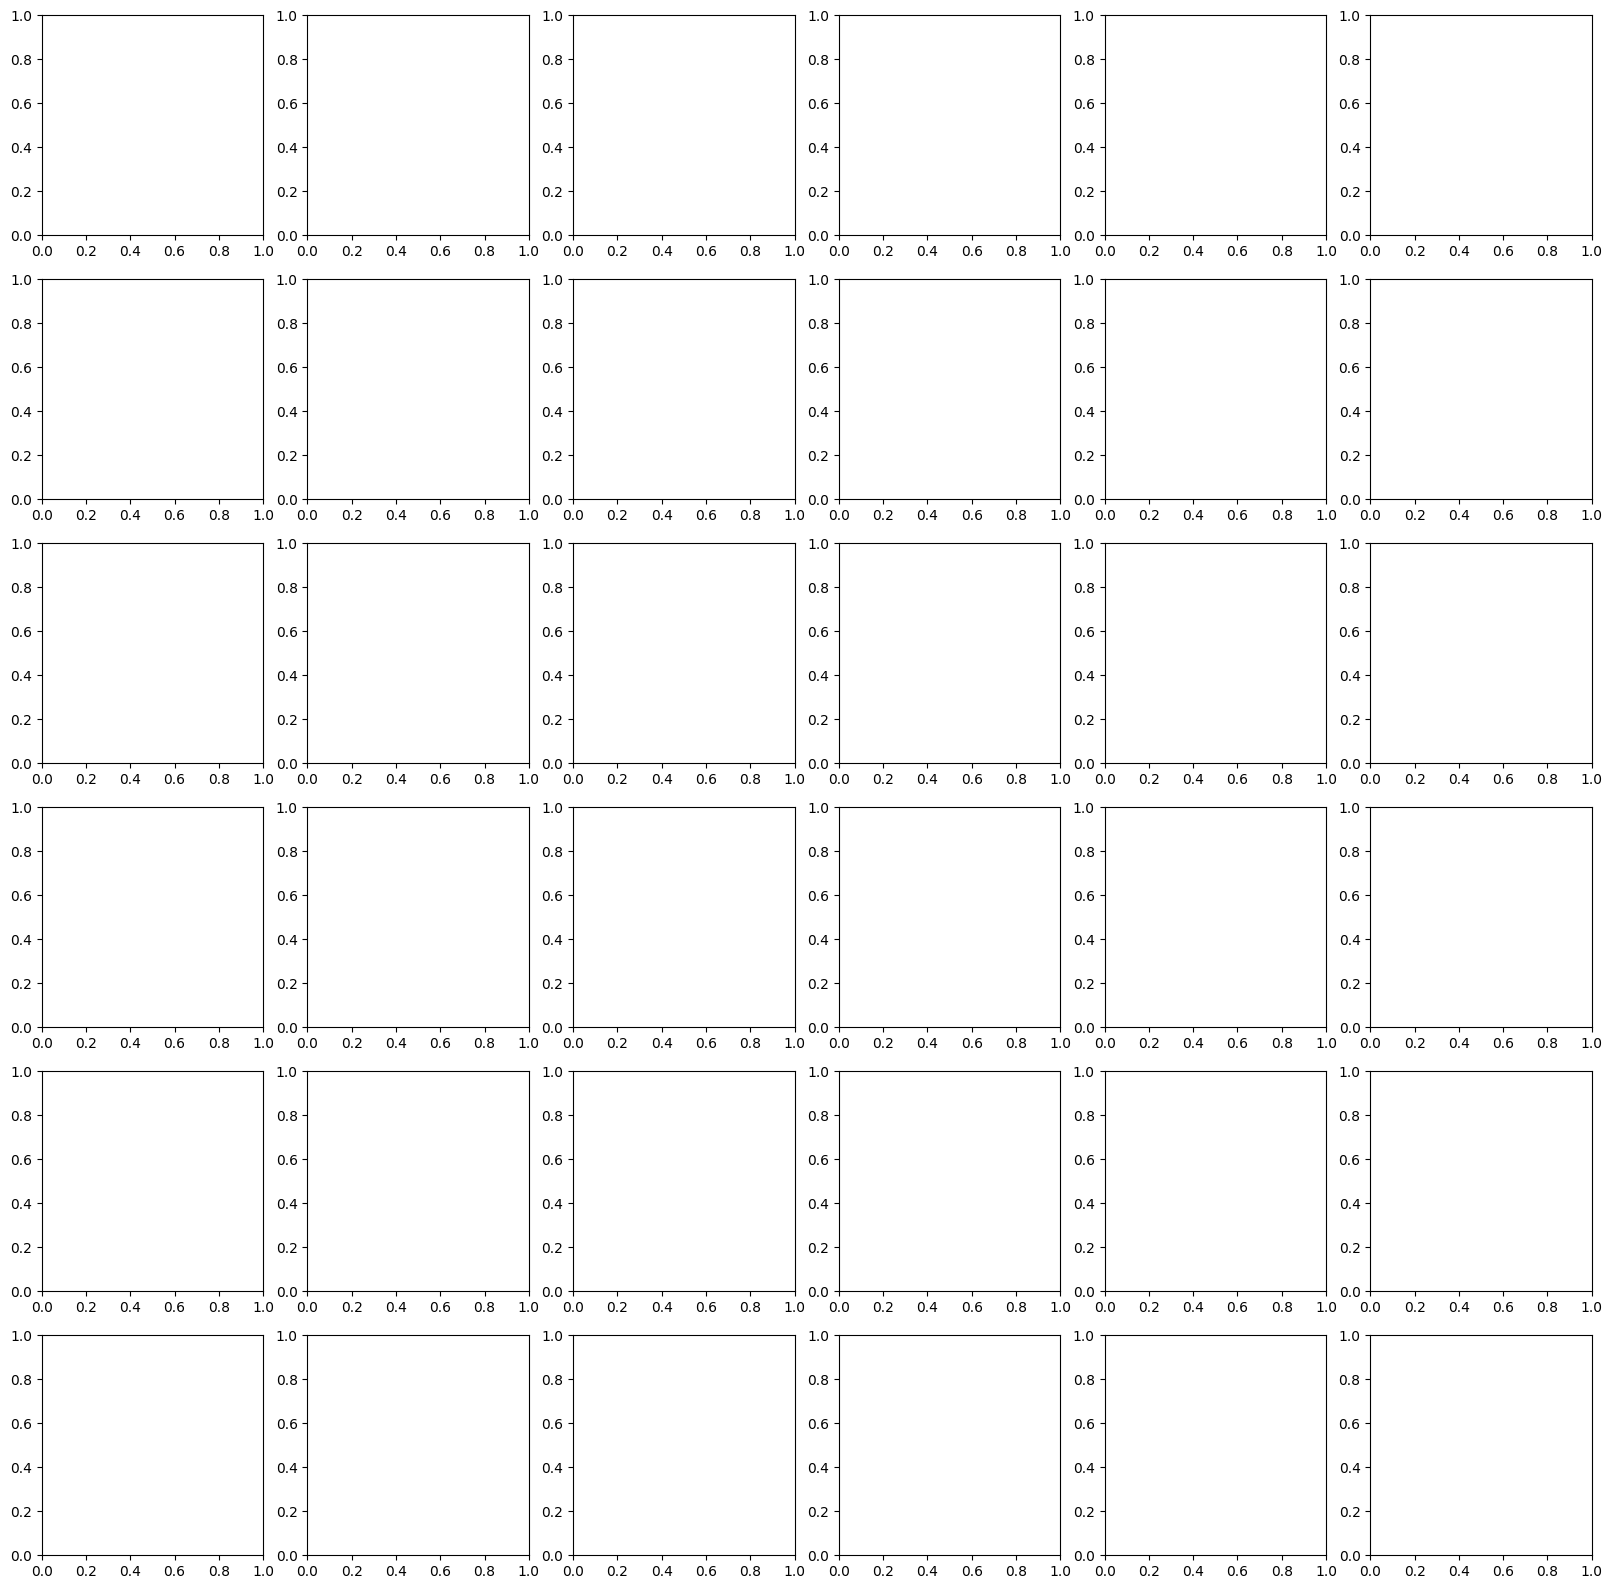

In [52]:
dataset.hist(figsize=(20,20))
dataset.MasVnrType

In [ ]:
dataset.select_dtypes('number').corr()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
LotArea,-0.033226,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


<Axes: >

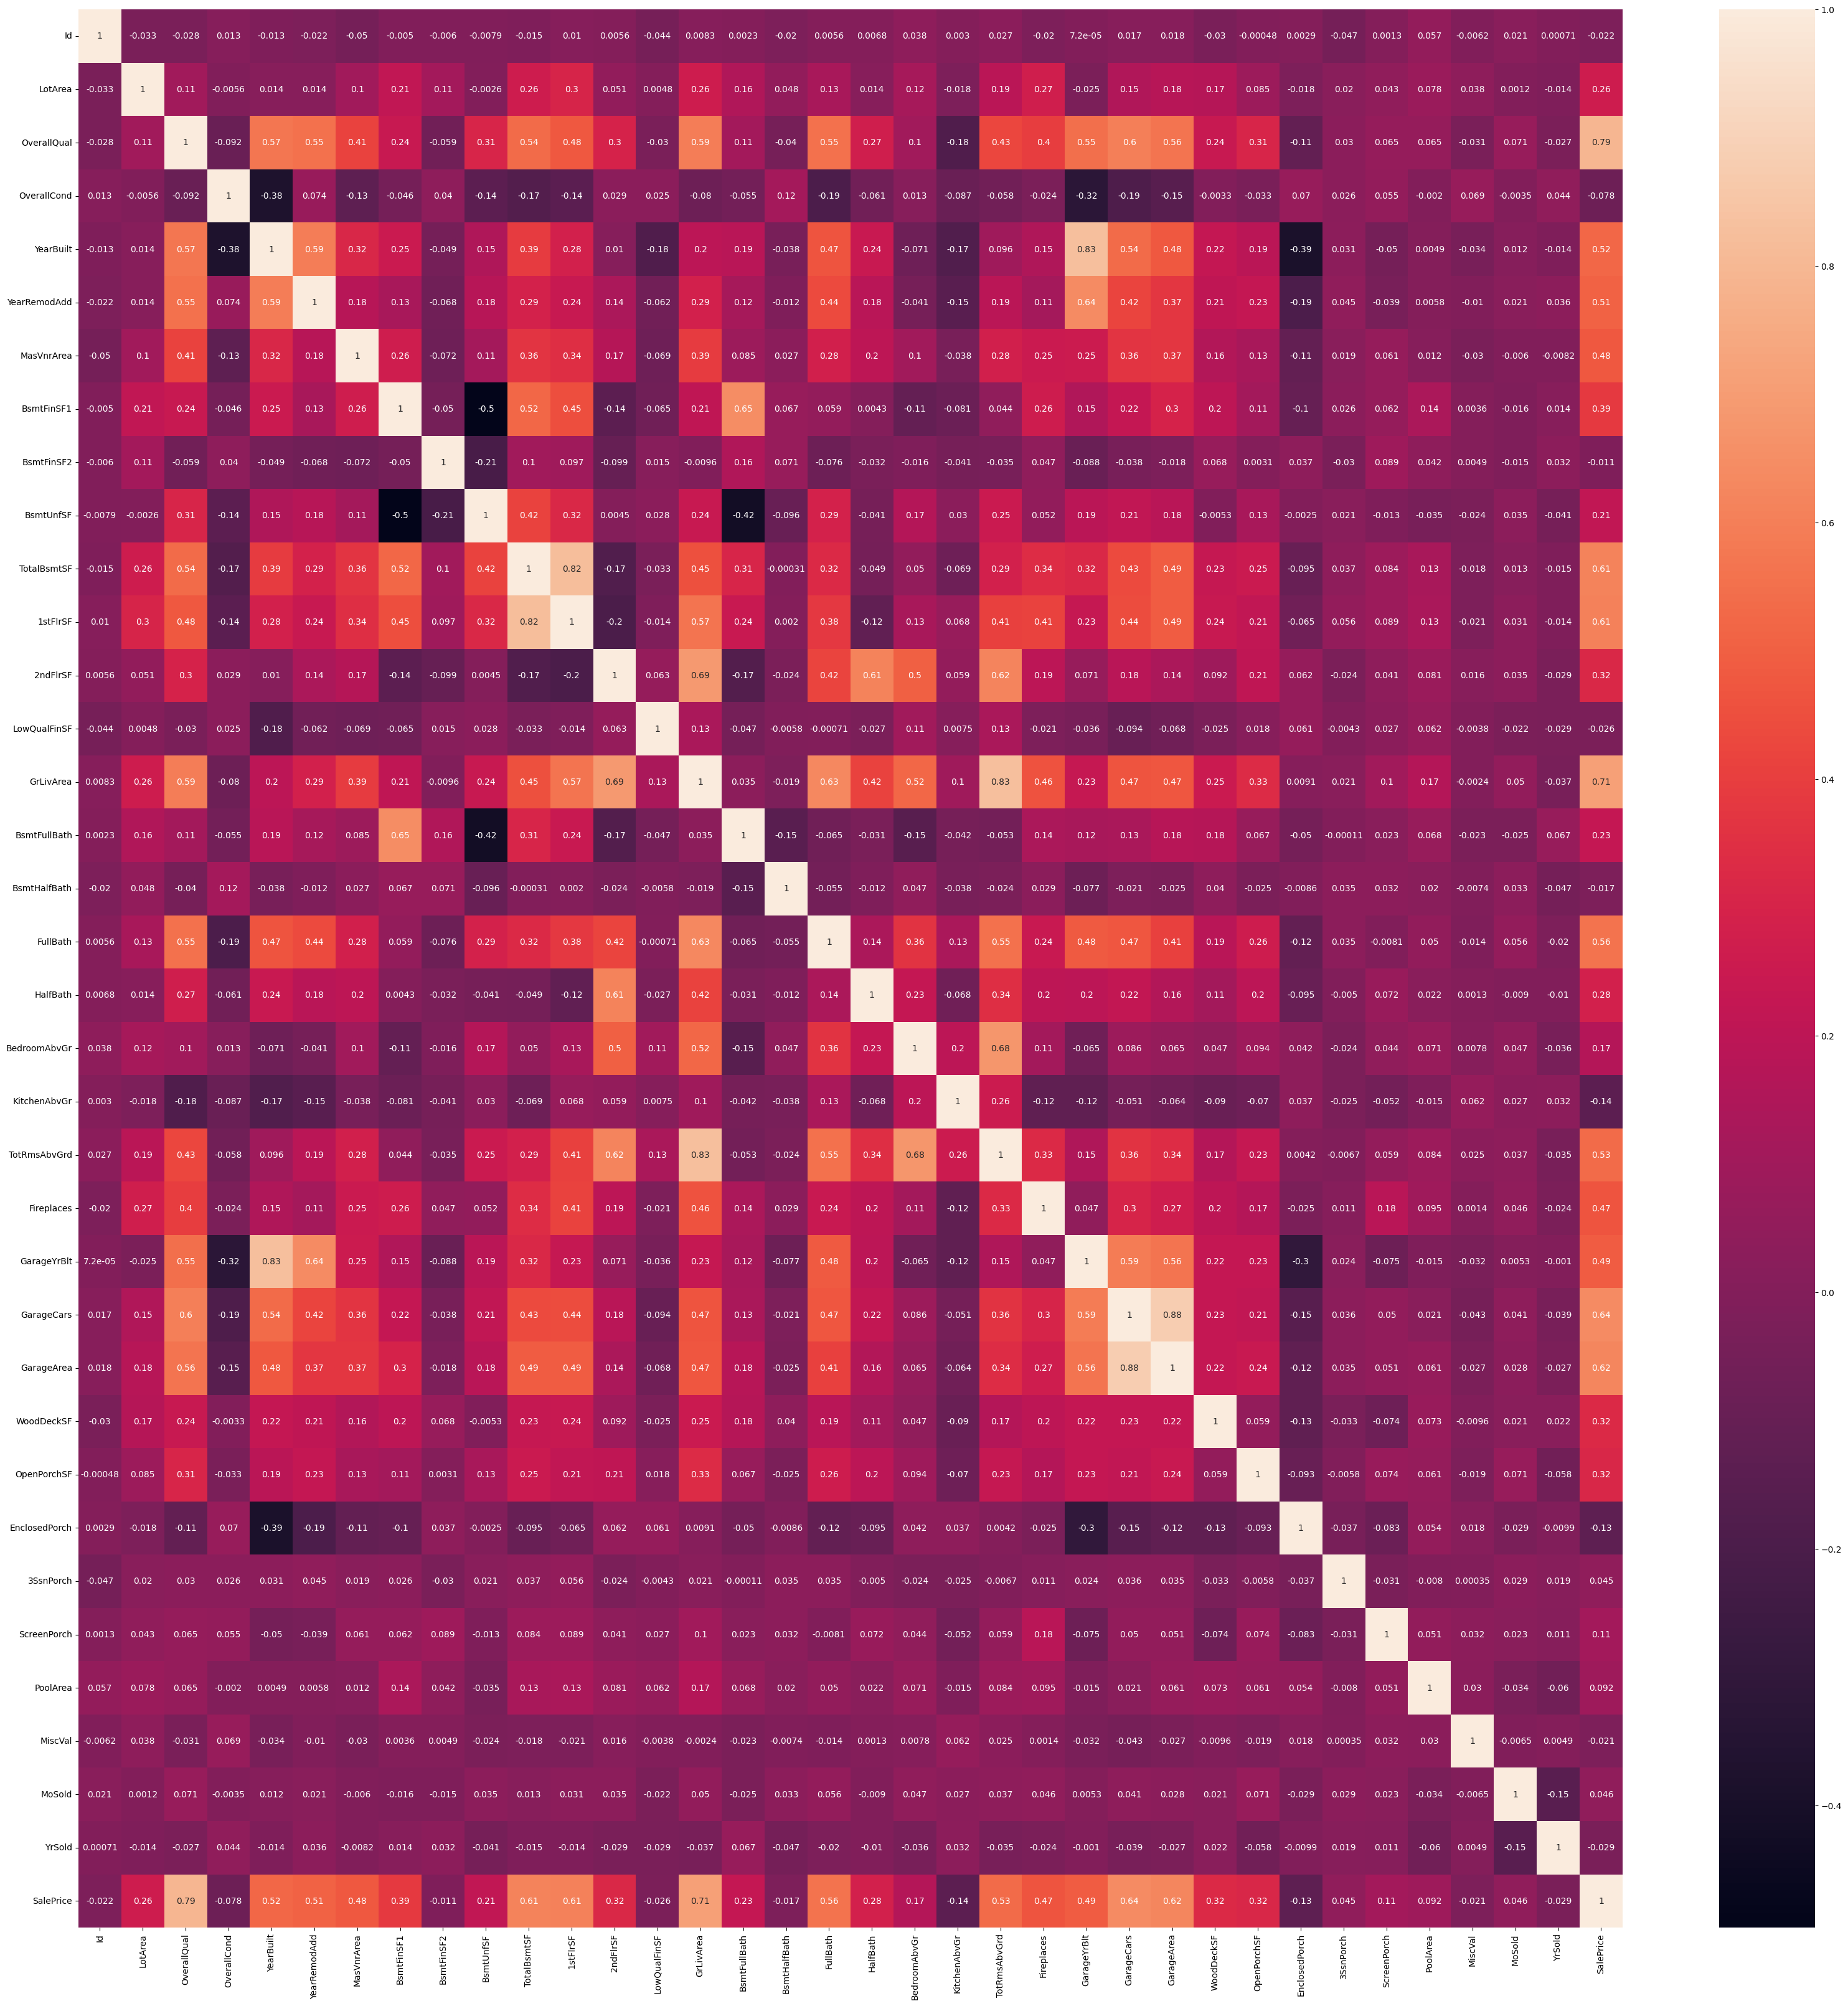

In [ ]:
import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(dataset.select_dtypes('number').corr(), annot=True)
